In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
data = pd.read_csv('data/export_2_simplified.csv', index_col=0)
data.head()

,dtStartDate,dtCloseDate,iFee,iProbability,iProjectProbability,FactoredCostSTD,dtCreateDate,dtRFPDate,dtPresentationDate,iMarketBudget,...,BusinessCheck,vchCity,iStateId,vchPostalCode,iCountryId,StageID,stageName,StageTypeID,StageTypeName,DeleteRecord
vchProjectName,,,,,,,,,,,,,,,,,,,,,
Westco Service Company,2016-05-24 00:00:00.0,2016-06-30 00:00:00.0,0.0,0.0,100,0.0,2016-05-24 12:45:33.417,NaN,NaN,0.0,...,0,Shadow Hills,8.0,NaN,2.0,12480,002- Qualified Opp/Demo Set,1,Open,0
Design Collaborative Inc,2016-05-20 00:00:00.0,2016-07-31 00:00:00.0,0.0,0.0,100,0.0,2016-05-24 09:50:43.7,NaN,NaN,0.0,...,0,NaN,0.0,NaN,2.0,12480,002- Qualified Opp/Demo Set,1,Open,0
Endurable Building Products,NaN,NaN,0.0,0.0,100,0.0,2016-05-23 16:35:52.983,NaN,NaN,0.0,...,0,NaN,0.0,NaN,2.0,12479,001- New Opportunity,1,Open,0
Ironwood Construction,2016-05-23 00:00:00.0,2016-06-30 00:00:00.0,0.0,0.0,100,0.0,2016-05-23 15:04:38.52,NaN,NaN,0.0,...,0,NaN,49.0,NaN,2.0,12480,002- Qualified Opp/Demo Set,1,Open,0
M. A. Mortenson Company,NaN,NaN,0.0,0.0,100,0.0,2016-05-23 11:15:32.76,NaN,NaN,0.0,...,0,NaN,0.0,NaN,2.0,12479,001- New Opportunity,1,Open,0


In [16]:
data.shape

(1000, 22)

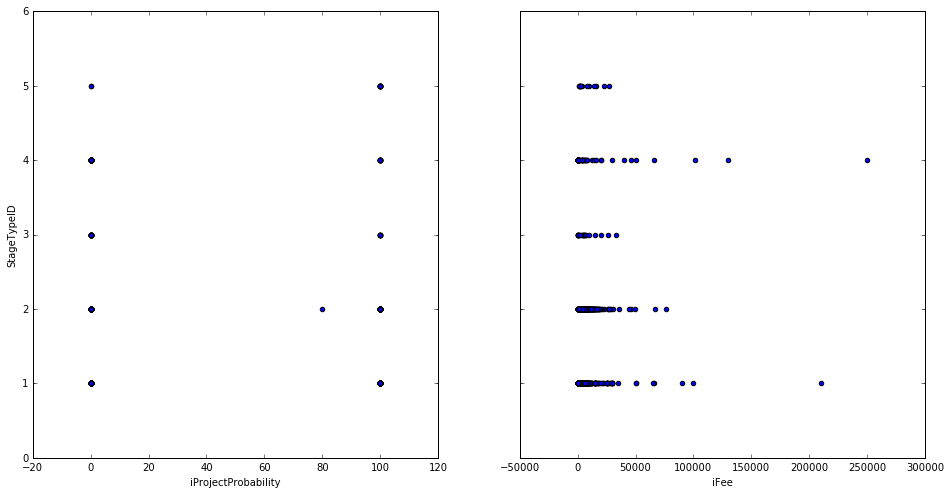

In [28]:
fig, axs = plt.subplots(1,2, sharey=True)
data.plot(kind='scatter', x = 'iProjectProbability', y='StageTypeID', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x = 'iFee', y='StageTypeID', ax=axs[1])
#data.plot(kind='scatter', x = 'DeleteRecord', y='StageTypeID', ax=axs[2])

In [39]:
import statsmodels.formula.api as smf

#dummies = pd.get_dummies(data['dtPresentationDate'])
new_data = data[pd.notnull(data['dtPresentationDate'])]

new_data.head()

# fitted model.
lm = smf.ols(formula='StageTypeID ~ iFee', data=new_data ).fit()

print(lm.params)
print( lm.summary() )

Intercept    1.597370
iFee         0.000024
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            StageTypeID   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.6351
Date:                Wed, 25 May 2016   Prob (F-statistic):              0.432
Time:                        10:32:28   Log-Likelihood:                -50.035
No. Observations:                  33   AIC:                             104.1
Df Residuals:                      31   BIC:                             107.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------

In [22]:
# manually. 50,000 extra spending on TV.
7.032594 + 0.047537 * 50

# using statsmodel
X_new = pd.DataFrame({'TV':[50]})
X_new.head()
lm.predict(X_new)

array([ 9.40942557])

In [18]:
lm.predict(X_new)

array([ 9.40942557])

In [23]:
# least squares.
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [24]:
preds = lm.predict(X_new)
preds

array([  7.0658692 ,  21.12245377])

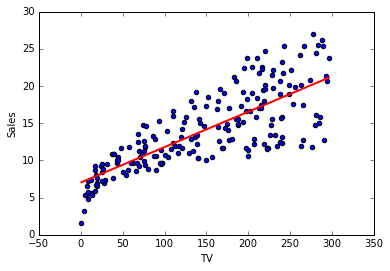

In [27]:
# plot of the observed data
data.plot(kind='scatter', x="TV", y='Sales')
plt.plot(X_new, preds, c='red', linewidth=2)

In [28]:
# confidence intervals for the model coefficients.
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [29]:
# p values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [30]:
lm.rsquared

0.61187505085007099

In [31]:
# Multiple Linear Regression
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64